In [8]:
envname = 'variables/loop_env_stim10e-16.0et6.0ph1.0p1.0tchoose_23plNonebp0.5'
#envname = 'variables/loop_env_stim10e-16.0et6.0ph1.0p1.0t0.1plNonebp0.5_big'

In [9]:
# import stuff
from placerg.funcs import *
from placerg.funcsrg import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

In [51]:
# set up notebook displayt
np.set_printoptions(threshold=5)
alpha=0.4
color='black'
cmap='Greys'
colorline='black'
linethick=3.
colorfit='grey'
plt.style.use('seaborn-paper')
palit=['black', 'firebrick',  \
       'coral', 'goldenrod', 'gold', 'yellowgreen', 'greenyellow', 'lime', 'aquamarine', 'mediumturquoise',\
        'lightskyblue', 'cornflowerblue', 'mediumpurple', 'mediumorchid', 'violet', 'mediumvioletred', \
         'fuchsia', 'deeppink', \
         'hotpink', 'pink' ]
fontsize=40
ticksize=30
fontsizesmall=15*1.3
ticksizesmall=12.5*1.3
legendsize=30
alpha=.3
fontsize=9
ticksize=8.5
markersize=2
colorfit='gray'
linecolor='black'
mycmap = cm.gnuplot
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
markersize=2

In [52]:
# load in objects
allo=load_object(envname)

In [53]:
labels=[]
for i in range(len(allo.timeconst)):
    labels.append(np.round((np.max(allo.timeconst[i])-np.min(allo.timeconst[i])), 3))

In [54]:
allo.label=labels

In [55]:
allo.timeconst[0]

array([6.6e-02, 8.8e-02, 1.0e-01, ..., 1.0e+02, 1.5e+02, 1.9e+02])

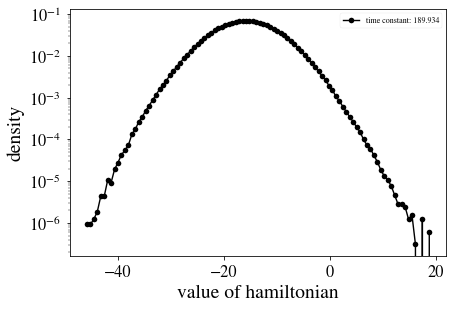

In [56]:
"""
histogram hamiltonians
"""
for i in range(len(allo.hamx)):
    plt.plot(allo.hamx[i],allo.ham[i], '-o', \
                 color=palit[i],\
                 label=str(allo.labeltype[i])+': '+str(allo.label[i]))
plt.yscale('log')
plt.xlabel('value of hamiltonian', fontsize=fontsizesmall)
plt.ylabel('density', fontsize=fontsizesmall)
plt.tick_params(labelsize=ticksizesmall)
plt.tight_layout()
plt.legend()
name=str(envname)+'hamiltonian.png'
plt.savefig(name)


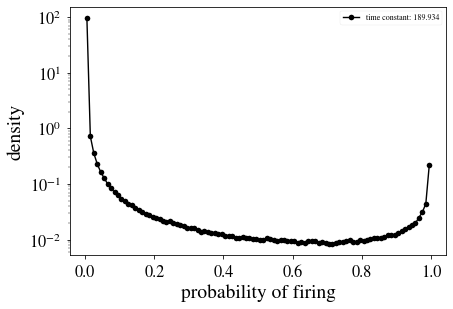

In [57]:
"""
histogram probability of firing
"""

for i in range(len(allo.probx)):
    plt.plot(allo.probx[i],allo.prob[i], '-o', label=str(allo.labeltype[i])+': '+str(allo.label[i]),\
                color=palit[i])

plt.yscale('log')
plt.xlabel('probability of firing', fontsize=fontsizesmall)
plt.ylabel('density', fontsize=fontsizesmall)
plt.tick_params(labelsize=ticksizesmall)
plt.tight_layout()
plt.legend()
name=str(envname)+'prob.png'
plt.savefig(name)

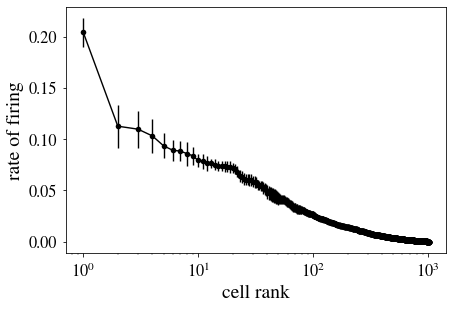

In [58]:
"""
plot average activity for each cell
avg cell activity vs. cell rank (ranked by most active to least active)
"""

for i in range(len(allo.ratex)):
    plt.errorbar(allo.ratex[i]*1024,allo.rate[i], allo.rateerr[i],label=str(allo.labeltype[i])+': '\
                 +str(allo.label[i]),\
                 color=palit[i], marker='o')

plt.xscale('log')
plt.xlabel('cell rank', fontsize=fontsizesmall)
plt.ylabel('rate of firing', fontsize=fontsizesmall)
plt.tick_params(labelsize=ticksizesmall)
plt.tight_layout()
#plt.legend()
name=str(envname)+'rank.png'
plt.savefig(name)

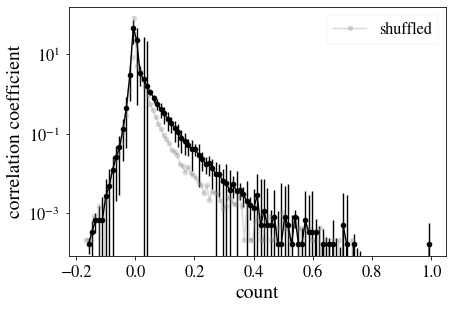

In [59]:
"""
plot distribution of correlation coefficients
"""
i=0
plt.errorbar(allo.coeffx[i], allo.coeff[i], allo.coefferr[i], marker='o', \
                    color='black')
plt.plot(allo.shuffcoeffx[i], allo.shuffcoeff[i], '-o', \
                     label='shuffled', color=colorfit, alpha=alpha)
plt.ylabel('correlation coefficient', fontsize=fontsizesmall)
plt.xlabel('count', fontsize=fontsizesmall)
plt.tick_params(labelsize=ticksizesmall)
plt.legend(fontsize=ticksizesmall)
plt.yscale('log')
plt.tight_layout()
name=str(envname)+'corr.png'
plt.savefig(name)

# variance of activity at each RG step over clusters

In [60]:
len(allo.eigspecx[0])

5

In [61]:
len(allo.eigspec[0])

5

In [62]:
len(allo.eigspecerr[0])

5

/home/mia/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


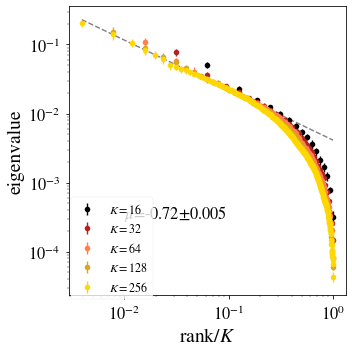

In [63]:
"""
Here plot the eigenvalues from each sucessive RG step, averaged over all clusters and
normalized by cluster size.
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(5*len(allo.coeffx), \
                                                                    int(5*len(allo.coeffx))))
l=0
errplot=allo.eigspecerr[l]
xplot,plot=(allo.eigspecx[l], allo.eigspec[l])
plt.ylabel('eigenvalue', fontsize=fontsizesmall)
for m in range(len(xplot)):
    plt.errorbar(xplot[m], plot[m], yerr = errplot[m], \
         label= r'$K=$'+str(2**(m+4)), color=palit[m], marker='o', linestyle='None')
plt.xlabel('rank$/K$', fontsize=fontsizesmall)
popt=allo.mu[l]
plt.plot(xplot[m],linfunc(xplot[m], \
                                popt[0], popt[1]), '--', color=colorfit)
plt.tick_params(labelsize=ticksizesmall)
plt.text(.01, .0003, r'$\mu$='+ str(np.round(popt[1],2))+r'$\pm$'+str(np.round(allo.muerr[i][0], 3)), \
                   fontsize=ticksizesmall)
plt.yscale('log')
plt.xscale('log')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(z, []) for z in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=12, loc=[0.2,.15])
plt.tight_layout()
name=str(envname)+'eigs.png'
plt.savefig(name)

In [23]:
len(allo.varerr[0])

9

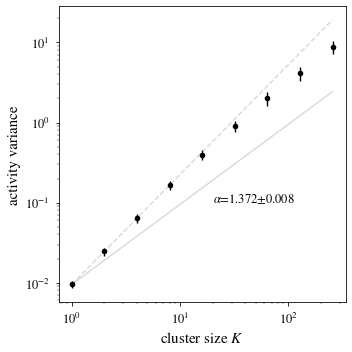

In [24]:
"""
plot coarse grained variance vs. cluster size
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(5*len(allo.coeffx), \
                                                                    int(5*len(allo.coeffx))))
ax.set_ylabel('activity variance', fontsize=fontsizesmall)
i=0
ax.errorbar(allo.varx[i],allo.var[i],  allo.varerr[i], \
                     label=str(allo.labeltype[i])+': '+str(allo.label[i]), \
                     color='black', marker='o', linestyle='None')
popt = allo.alpha[i]
ax.plot(allo.varx[i],linfunc(allo.varx[i], \
                                popt[0], popt[1]), '--', color=colorfit, alpha=alpha)
ax.set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
ax.plot(allo.varx[i], linfunc(allo.varx[i], popt[0], 1.), \
                     alpha=alpha, color=colorfit)
ax.text(20, .1, r'${\alpha}$='+ str(np.round(popt[1],3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[i][0], 3)), fontsize=ticksizesmall)
ax.tick_params(labelsize=ticksizesmall)
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()
name=str(envname)+'var.png'
plt.savefig(name)

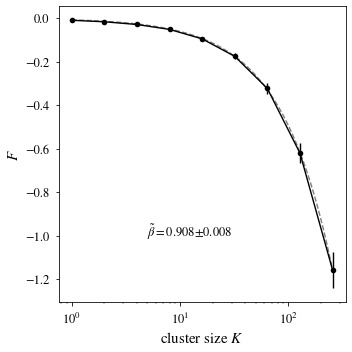

In [25]:
"""
Plot log probability of complete cluster silence vs cluster size
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(5*len(allo.coeffx), \
                                                                    int(5*len(allo.coeffx))))
ax.set_ylabel(r'$F$', fontsize=fontsizesmall)
x=allo.psilx[i]
y=allo.psil[i]
popt= allo.beta[i]
ax.errorbar(allo.psilx[i], allo.psil[i],allo.psilerr[i], \
                     label=str(allo.labeltype[i])+': '+str(allo.label[i]), color='black', marker='o')
ax.plot(np.arange(np.min(allo.psilx[i]),np.max(allo.psilx[i]), .01),\
                 (probfunc(np.arange(np.min(allo.psilx[i]),np.max(allo.psilx[i]), .01), \
                           popt[0], popt[1])), '--', color=colorfit)
ax.text(5, -1.0, r'$\tilde{\beta}=$'+str(np.round(popt[1], 3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[i][0], 3)), fontsize=ticksizesmall)
ax.tick_params(labelsize=ticksizesmall)
ax.set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
ax.set_xscale('log')
plt.tight_layout()
name=str(envname)+'freeenergy.png'
plt.savefig(name)

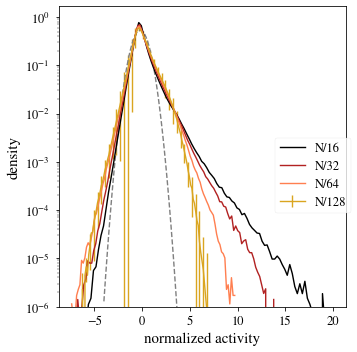

In [26]:
x=allo.actmomx
plott=allo.actmom
plterr=allo.actmomerr
fig, ax = plt.subplots(1,int(len(allo.eigspec)), figsize=(5*len(allo.coeffx), \
                                                                    int(5*len(allo.coeffx))))
ax.set_ylabel('density', fontsize=fontsizesmall)
l=0
for i in (np.arange(len(allo.actmomx[0]))):
    if i==3:
        ax.errorbar(x[l][i],plott[l][i], plterr[l][i], label='N/'+str(2**(i+4)),  errorevery=3,\
                          color=palit[i])
    else:
        ax.errorbar(x[l][i],plott[l][i], label='N/'+str(2**(i+4)),  \
                          color=palit[i])
        
popt, pcov = curve_fit(gaussian,x[l][i], plott[l][i])
ax.plot(np.arange(-4, 4,.1), \
            gaussian(np.arange(-4, 4, .1),\
            popt[0], popt[1]), '--', color=colorfit)
ax.tick_params(labelsize=ticksizesmall)
ax.set_xlabel('normalized activity', fontsize=fontsizesmall)
ax.set_yscale('log')
ax.set_ylim(10**-6)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(z, []) for z in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=ticksizesmall, loc='center right')
plt.tight_layout()
name=str(envname)+'momdist.png'
plt.savefig(name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


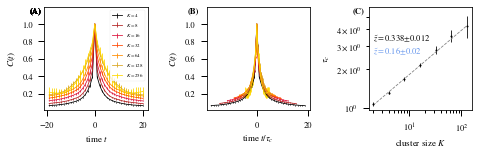

In [49]:
minnm=2
maxxm=256
mrangem=np.abs(minnm-maxxm)
palit=['black','firebrick', 'crimson', 'orangered', 'darkorange', 'goldenrod', 'gold', 'khaki']
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
fig, ax = plt.subplots(1,3, figsize=(2*27/8,27/(8*1.5)))
ylabel= r'$C(t)$'
c=0   
whc = 0
for h in np.array([whc]):
    for i in range(result[h].shape[0]):
        #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
        ax[c].errorbar((x[h][int(result[h].shape[1]/2)-\
                    20:int(result[h].shape[1]/2)+20]), \
                     (result[h][i, int(result[h].shape[1]/2)-20:int(result[h].\
                        shape[1]/2)+20]),\
                       (plterr[h][i][int(result[h].shape[1]/2)-20:int(result[h]\
                                                             .shape[1]/2)+20]), \
                     label=r'$K$ ='+str(2**(i+2)),color=palit[i],\
                             linewidth=.8,markersize=markersize)
        ax[c].set_xlabel(r'time $t$', fontsize=fontsize)
        #ax[c].text(-18, 1.0, str(allo.labeltype[h])+': '+str(np.round(allo.label[h],2)), \
                               #fontsize=fontsize)
        ax[c].tick_params(labelsize=ticksize)
        ax[c].set_ylim(top=1.19)
        ax[c].tick_params(length=6, width=1, which='major', labelsize=ticksize)
        ax[c].tick_params(length=3, width=1, which='minor', labelsize=ticksize)
        ax[c].legend(fontsize=ticksize-3.5)
        ax[c].text(-27, 1.12, '(A)', fontsize=ticksize, weight='bold')
        ax[c].set_ylabel(ylabel, fontsize=fontsize)
c+=1

minnm=2
maxxm=256
mrangem=np.abs(minnm-maxxm)
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
ylabel= r'$C(t)$'
for h in np.array([whc]):
    for i in range(result[h].shape[0]):
        #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
        ax[c].errorbar((x[h][int(result[h].shape[1]/2)-\
                     20:int(result[h].shape[1]/2)+20])/allo.tau[h][i], \
                     (result[h][i, int(result[h].shape[1]/2)-20:int(result[h].\
                        shape[1]/2)+20]),\
                       (plterr[h][i][int(result[h].shape[1]/2)-20:int(result[h]\
                                                            .shape[1]/2)+20]), \
                           label=r'$K$ ='+str(2**(i+2)),  color=palit[i],\
                             linewidth=.8,markersize=markersize)
    ax[c].set_xlabel(r'time $t/\tau_c$', fontsize=fontsize)
    ax[c].tick_params(labelsize=ticksize)
    ax[c].set_ylim(top=1.19)
    ax[c].tick_params(length=6, width=1, which='major', labelsize=ticksize)
    ax[c].tick_params(length=3, width=1, which='minor', labelsize=ticksize)
    ax[c].text(-27, 1.13, '(B)', fontsize=ticksize, weight='bold')
    ax[c].set_ylabel(ylabel, fontsize=fontsize)
c+=1
ylabel= r'$\tau_c$' 
for h in np.array([whc]):
    ax[c].errorbar(2**np.arange(1,8),allo.tau[h],allo.tauerr[h], color=colorline, \
              label='taus', marker='o',linestyle='None', markersize=markersize, elinewidth = .8)
    popt= allo.z[h]
    ax[c].plot(2**np.arange(1,8), linfunc(2**np.arange(1,8), \
                                    popt[0], popt[1]), '--', label='fit', \
               color=colorfit, linewidth=.8)
    ax[c].set_xlabel(r'cluster size $K$', fontsize=fontsize)
    ax[c].tick_params(labelsize=ticksize)
    ax[c].text(2, 3.3, r'$\tilde{z}=$'+str(round(popt[1],3))+r'$\pm$'+\
                   str(np.format_float_positional(allo.zerr[h][0], unique=False, precision=3)), fontsize=ticksize)
    ax[c].text(2, 2.6, r'$\tilde{z}=$'+str(0.16)+r'$\pm$'+\
                   str(0.02), fontsize=ticksize, color='cornflowerblue')
    ax[c].set_yscale('log')
    ax[c].set_xscale('log')
    ax[c].set_ylim(top=5.9)
    ax[c].tick_params(length=6, width=1, which='major', labelsize=ticksize)
    ax[c].tick_params(length=3, width=1, which='minor', labelsize=ticksize)
    ax[c].text(0.8,5.3, '(C)', fontsize=ticksize, weight='bold') 
    ax[c].set_ylabel(ylabel, fontsize=fontsize)
c+=1
plt.tight_layout()
name='variables/fig_2_mixed.eps'
plt.savefig(name)

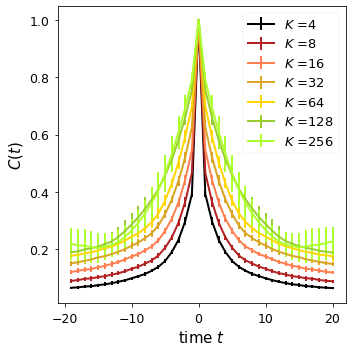

In [20]:
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(5*len(allo.coeffx), \
                                                                    int(5*len(allo.coeffx))))
ax.set_ylabel(r'$C(t)$', fontsize=fontsizesmall)
l=0
for i in range(result[l].shape[0]):
            #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
            ax.errorbar((x[l][int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]), \
                     (result[l][i, int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]),\
                       (plterr[l][i][int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]), \
                           label=r'$K$ ='+str(2**(i+2)),color=palit[i],\
                             linewidth=2)
            ax.set_xlabel(r'time $t$', fontsize=fontsizesmall)
            ax.tick_params(labelsize=ticksizesmall)
ax.legend(fontsize=fontsizesmall-2)
plt.tight_layout()
name=str(envname)+'dynamic.png'
plt.savefig(name)

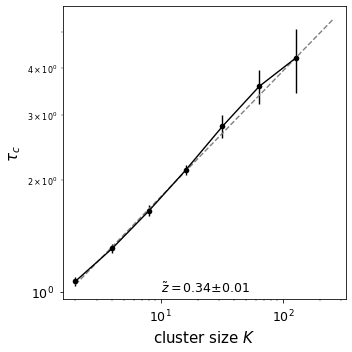

In [21]:
"""
plot exponents
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(5*len(allo.coeffx), \
                                                                    int(5*len(allo.coeffx))))
ax.set_ylabel(r'$\tau_c$', fontsize=fontsizesmall)
l=0
ax.errorbar(2**np.arange(1,8),allo.tau[l], allo.tauerr[l], color=colorline, \
              label='taus', marker='o')
popt= allo.z[l]
       # print(popt[1])
ax.plot(2**np.arange(1,9), linfunc(2**np.arange(1,9), \
                                    popt[0], popt[1]), '--', label='fit', color=colorfit)
ax.set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
ax.tick_params(labelsize=ticksizesmall)
        #ax[l].legend(fontsize=ticksize)
ax.text(10, 1, r'$\tilde{z}=$'+str(np.round(popt[1],2))+r'$\pm$'+\
                   str(np.round(allo.zerr[l][0], 2)), fontsize=ticksizesmall)
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()
name=str(envname)+'dynamicexps.png'
plt.savefig(name)

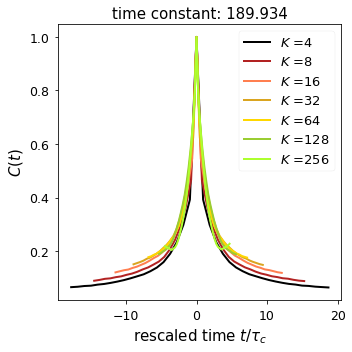

In [22]:
"""
now rescale each mean autocorrelation curve by its respective time constant
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(5*len(allo.coeffx), \
                                                                    int(5*len(allo.coeffx))))
ax.set_ylabel('$C(t)$', fontsize=fontsizesmall)
l=0
for i in range(result[l].shape[0]):
            ax.plot(x[l][int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]\
                       /allo.tau[l][i], \
                 result[l][i,int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]\
                , '-', label=r'$K$ ='+str(2**(i+2)),color=palit[i],\
                             linewidth=2)
            ax.set_xlabel(r'rescaled time $t/\tau_c$', fontsize=fontsizesmall)
            ax.tick_params(labelsize=ticksizesmall)
            ax.set_title(str(allo.labeltype[l])+': '+str(allo.label[l]), fontsize=fontsizesmall)
ax.legend(fontsize=fontsizesmall-2)
plt.tight_layout()
name=str(envname)+'dynamicrescale.png'
plt.savefig(name)